# 퍼셉트론

## 퍼셉트론이란?
- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 신호 = 흐름을 만들고 정보를 앞으로 전달, 1 = 신호가 흐른다, 0 = 신호가 흐르지 않는다
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력 = 뉴런이 활성화한다고 표현하기도 함
- $\theta$(세타) = 임계값, 정해진 한계
- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여
- $w$(가중치) = 각 신호가결과에 주는 영향력을 조절하는 요소, 가중치가 높을 수록 중요한 신호

## 단순한 논리 회로

### AND 게이트
- AND 게이트 = 입력이 둘 출력은 하나, 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력
- 진리표 = 입력 신호와 출력 신호의 대응 표

### NAND 게이트와 OR 게이트
- NAND = Not AND, AND 게이트의 출력을 뒤집은 것처럼 동작, 두 입력이 모두 1일 때만 0 출력, 그 외에는 1 출력
- AND 게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND 게이트가 된다
- OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로
- 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있으나, 퍼셉트론의 구조는 모두 똑같다
- 다른 것은 매개변수(가중치와 임계값)의 값뿐이다, 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정한 것

## 퍼셉트론 구현하기

### 간단한 구현부터

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2 # 가중치를 곱한 입력의 총 합
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### 가중치와 편향 도입

In [3]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
print(w*x) # 넘파이 배열끼리의 곱셈은 원소 수가 같아면 각 원소끼리 곱한다
print(np.sum(w*x)) # np.sum() 메서드는 입력한 배열에담긴 모든 원소의 총합을 계산
print(np.sum(w*x) + b) # 이 가중치에 편향을 더하면 계산 완료

[0.  0.5]
0.5
-0.19999999999999996


### 가중치와 편향 구하기

In [4]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

- 가중치 = 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- $b$(편향) = 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수
- $b$ 가 -0.1일 경우 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화
- $w$(가중치), $b$(편향) 으로 구별하기도 하지만 모두 가중치라고 하기도 함

In [5]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND 와는 가중치(w 와 b)만 다르다
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2  # AND 와는 가중치(w 와 b)만 다르다
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 퍼셉트론의 한계

### 도전! XOR 게이트
- XOR 게이트 = 배타적 논리합이라는 논리 회로
- XOR 게이트는 직선 하나로 나눌 수 없음

### 선형과 비선형
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다

## 다층 퍼셉트론이 출동한다면
- 층을 쌓아 다층 퍼셉트론을 만들 수 있다

### 기존 게이트 조합하기
- 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다, 단층 퍼셉트론으로는 비선형 영역을분리할 수 없다
- 각 입력 신호가 NAND 와 OR 게이트의 입력이 되고, NAND 와 OR 의 출력이 AND 게이트의 입력으로 이어진다

### XOR 게이트 구현하기

In [6]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [7]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


- XOR 은 2층 퍼셉트론, 이처럼 층이 여러개인 퍼셉트론을 다층 퍼셉트론이라 한다
- 단층 퍼셉트론으로 표현하지 못한 것을 층을 하나 늘리면 구현 가능

## NAND 에서 컴퓨터까지
- 이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다
- 퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고, 이론상 컴퓨터가 수행하는 처리도 모두 표현할 수 있다

## 정리
- 퍼셉트론은 입출력을 갖춘 알고리즘으로 입력을 주면 정해진 규칙에 따른 값을 출력
- 퍼셉트론에서는 가중치와 편향을 매개변수로 설정
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
- 다층 퍼셉트론은 이론상 컴퓨터를 표현할 수 있다

# 신경망

## 퍼셉트론에서 신경망으로

### 신경망의 예
- 입력층, 은닉층, 출력층으로 구성
- 은닉층의 뉴런은 사람의 눈에는 보이지 않는다
- 뉴련이 연결되는 방식은 퍼셉트론과 같ㅌ다

### 퍼셉트론 복습
- $x_1, x_2$ 라는 두 신호를 입력받나 $y$ 를 출력하는 퍼셉트론
    - $y = \begin{cases}0(b+w_1x_1+w_2x_2\leq0) \\ 1(b+w_1x_1+w_2x_2\gt0)\end{cases}$
- 여기서 $b$ 을 명시할 경우 입력이 1인 뉴런이 추가된다, 편향의 입력 신호는 항상 1
- 조건 분기의 동작(0을 넘으면 1, 그렇지 않으면 0을 출력)을 $h(x)$ 라는 하나의 함수로 표현
    - $y = h(b+w_1x_1+w_2x_2)$
    - $h(x) = \begin{cases}0(x\leq0) \\ 1(x\gt0) \end{cases}$
    - 입력 신호의 총합이 $h(x)$ 라는 함수를 거쳐 변환되어, 그 변환된 값이 $y$ 의 출력이 된다

### 활성화 함수의 등장
- $h(x)$ 처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 호라성화 함수라 한다
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할
- 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다
    - $a = b+w_1x_1+w_2x_2$
    - $y = h(a)$
    - 가중치가 달린 입력 신호와 편향의 총합을 계산한 $a$ 를 함수 $h()$ 에 넣어 $y$ 를 출력
- 가중치 신호를 조합한 결과가 $a$ 라는 노드가 되고, 활성화 함수 $h()$ 를 통과하여 $y$ 라는 노드로 변환되는 과정

## 활성화 함수
- 계단 함수 = 임계값을 경계로 출력이 바뀌는 활성화 함수

### 시그모이드 함수
- 시그모이드 함수를 나타낸 식
    - $h(x) = \frac{1}{1+exp(-x)}$
    - $exp(-x)$ 는 $e^-x$ 를 뜻하며 $e$ 는 자연상수로 2.7182.. 의 값을 ㄱ자는 실수
    - 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0) = 0.731...$, $h(2.0) = 0.880...$ 처럼 특정 값을 출력
- 신경망에서 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴턴에 전달
- 퍼셉트론과 신경망의 주된 차이는 활성화 함수, 그 외 뉴런이 여러 층으로 이어지는 구조와 전달하는 방법은 기본적으로 퍼셉트론과 같다

### 계단 함수 구현하기

In [8]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 인수 x 는 실수(부동소수점)만 받아들인다

In [9]:
def step_function(x):
    y = x> 0
    return y.astype(np.int)

- 넘파이 배열도 지원하도록 수정한 것

In [10]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x>0
print(y)

[-1.  1.  2.]
[False  True  True]


- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다
- 배열 x 의 원소 각각이 0보다 크면 True, 0 이하면 False 로 변환한 새로운 배열 y 가 생성된다

In [11]:
y = y.astype(np.int)
print(y)

[0 1 1]


C:\Users\lbw\AppData\Local\Temp\ipykernel_6216\4147947644.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


- 계단 함수는 0이나 1의 int 형을 출력하는 함수기에 배열 y 의 원소를 bool 에서 int 형으로 바꾼다
- astype() 메서드로 배열의 자료형 변환
- bool 을 int 로 변환하면 True 는 1, False 는 0으로 변환

### 계단 함수의 그래프

C:\Users\lbw\AppData\Local\Temp\ipykernel_6216\739440373.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


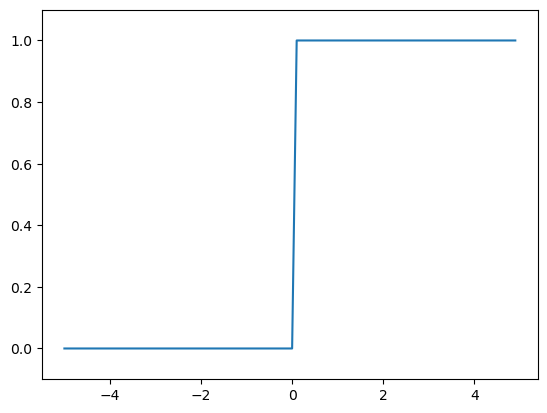

In [12]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

- np.arange(-5.0, 5.0, 0.1) 은 -5.0에서 5.0까지 0.1 간격의 넘파이 배열을 생성
- step_function() 은 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수를 실행해, 그 결과를 다시 배열로 만들어 돌려준다
- 그래프처럼 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀐다, 그 형태가 계단 같아서 계단 함수라 불린다

### 시그모이드 함수 구현하기

In [13]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


- 넘파이 배열이 처리 가능한 이유는 넘파이의 브로드캐스트 때문
- 브로드캐스트 기능 = 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [15]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


- 스칼라값 1.0과 넘파이 배열 사이에서 수치 연산을 한 것
- 결과적으로 스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘파이 배열로 출력

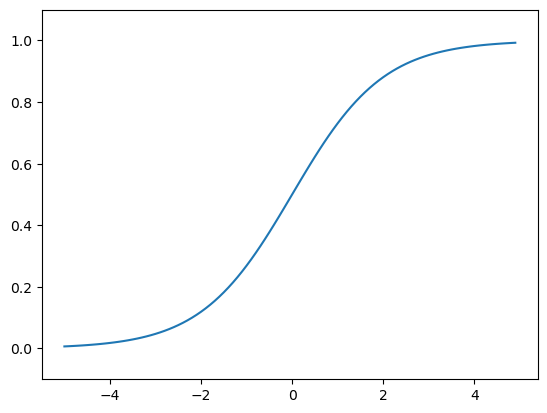

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축 범위 지정
plt.show()

### 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화, 계단 함수는 0을 경계로 출력이 갑자기 바뀐다
- 계단 함수가 0과 1 중 하나의 값만 돌려주는 반면, 시그모이드 함수는 실수를 돌려준다
- 퍼셉트론에서는 뉴련 사이에 0 혹은 1이 흘럿다면, 신경망에서는 연속적인 실수가 흐른다
- 두 함수 모두 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조
- 입력이 중요하면 큰 값을 출력 그렇지 않으면 작은 값 출력, 입력이 아무리 크거나 작아도 출력은 0에서 1 사이

### 비선형 함수
- 계단 함수와 시그모이드 함수 모두 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다, 선형 함수를 이용할 경우 신경망의 층을 깊게 하는 의미가 없어지기 때문


### ReLU 함수
- 0이 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수
- $h(x) = \begin{cases}x(x\gt0) \\ 0(x\leq0) \end{cases}$

In [17]:
def relu(x):
    return np.maximum(0, x)

- maximum 은 두 입력 중 큰 값을 선택해 반환하는 함수

## 다차원 배열의 계산

### 다차원 배열
- 다차원 배열 = 숫자의 집합

In [18]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) # 배열의 차원 수
print(A.shape) # 배열의 형상, 튜플로 반환
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [19]:
B = np.array([[1, 2], [3, 4], [5, 6]]) # 3*2 배열
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


- 2차원 배열 = 행렬, 가로 방향을 행, 세로 방향을 열이라고 한다

### 행렬의 곱
- 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산

In [20]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


- np.dot() 은 입력이 1차원 배열이면 벡터를, 2차원 배열리면 행렬 곱을 계산

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


- 행렬의 형상에 주의, 왼쪽 행렬 1번째 차원의 원소 수(열 수)와 오른쪽 행렬의 0번재 차원의 원소 수(행 수)가 같아야 한다

In [22]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
print(np.dot(A, C))

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

- 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다
- 2차원 행렬과 1차원 배열도 대응하는 차원의 원소의 수를 일치시켜야 한다

In [23]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 신경망에서의 행렬 곱

In [24]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W) # 다차원 배열의 스칼라곱을 구해주는 함수
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기
- 넘파이 배열을 잘 쓰면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다

### 각 층의 신호 전달 구현하기

In [25]:
X = np.array([1.0, 0.5]) # 입력
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 0층의 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 0층의 편향

# 대응하는 차원의 원소 수
print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 # 1층 뉴런으로 전달된 가중치 합


(2, 3)
(2,)
(3,)


In [26]:
Z1 = sigmoid(A1) # 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열 반환

print(A1)
print(Z1) # 1층의 출력, 2층의 입력

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1층의 가중치
B2 = np.array([0.1, 0.2]) # 1층의 편향

# 대응하는 차원의 원소 수
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2 # 2층으로 전달된 가중치 합
Z2 = sigmoid(A2) # 2층에 출력, 출력층으로 전달

(3,)
(3, 2)
(2,)


In [28]:
def identity_function(x): # 항등 함수, 입력을 그대로 출력
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # 2층의 가중치
B3 = np.array([0.1, 0.2]) # 2층의 편향

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y + A3

### 구현 정리

In [29]:
def init_network(): # 가중치와 편향 초기화 후 딕셔너리 변수인 network 에 저장
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x): # 입력 신호를 출력으로 변환하는 처리 과정 모두 구현, 순방향(순전파)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기
- 신경망은 븐루와 회귀 모두에 이용 가능, 일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수 사용

### 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수 = 입력을 그대로 출력
- 소프트맥스 함수 = $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
    - $exp(x)$ 는 $e^x$ 을 뜻하는 지수 함수, $e$ 는 자연상수, $n$ 은 출력층의 뉴런 수, $y_k$ 는 그중 $k$ 번째 출력임을 뜻한다
    - 소프트맥스 함수의 분자는 입력신호 $a_k$ 의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다

In [30]:
a = np.array([0.3, 2.0, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881  7.3890561  54.59815003]
63.33706493965089
[0.0213123  0.11666243 0.86202526]


In [31]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 시 주의점
- 컴퓨터로 계산할 때는 오버플로 문제라는 결함이 있다
- 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 쉽게 아주 큰 값을 내뱉고 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다
- 문제를 해결하도록 개선한 수식
    - $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)} = \frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)} \\
    \quad\quad\quad\quad\quad\quad\quad= \frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)} \\
    \quad\quad\quad\quad\quad\quad\quad= \frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}$
    - $C$ 라는 임의의 정수를 분자와 분모 양쪽에 곱하고 $C$ 를 지수 함수 $exp()$ 안으로 옮겨 $logC$ 로 만든 후에 $C'$ 라는 새로운 기호로 바꾼다
    - 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과가 바뀌지 않는다
    - $C'$ 에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

In [32]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다

c = np.max(a) # c = 1010(최댓값)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\lbw\AppData\Local\Temp\ipykernel_6216\3550095242.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다
C:\Users\lbw\AppData\Local\Temp\ipykernel_6216\3550095242.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다


In [33]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수, 출력의 총합은 1
- 출력 총합이 1이 된다는 점으로 확률로 해석할 수 있다
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다, 지수 함수 $y = exp(x)$ 가 단조 증가 함수이기 때문이다
- 신경망을 이용한 분류에서는 지수 함수 계산에 드는 자원 낭비를 줄이기 위해 출력층의 소프트맥스 함수를 생략하는 것이 일반적

### 출력층의 뉴런 수 정하기
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

## 손글씨 숫자 인식
- 추론 과정을 신경망의 순전파라고도 한다

### MNIST 데이터셋

In [35]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
    
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- load_mnist 함수는 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환
    - normalize = 픽셀값 0.0~1.0 사이의 값으로 정규화
    - flatten = 1차원 배열화
    - one_hot_label = 레이블을 원-핫 인코딩 형태로 저장

In [41]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


- flatten=True 로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있기 때문에 reshape() 메서드로 배열의 형상을 변환하고 Image.fromarray() 로 넘파이로 저장된 이미지 데이터를 PIL 용 데이터 객체로 변환해야 한다

### 신경망의 추론 처리
- 입력층 뉴련 784개, 출력층 뉴런 10개로 구성된 추론을 수행하는 신경망 구현
    - 입력층 뉴런 수는 이미지 크기가 28 * 28 = 784 이기 때문
    - 출력층 뉴런 수는 0에서 9까지의 숫자를 구분하는 문제이기 때문
- 은닉층은 1층은 50, 2층은 100개의 뉴런 배치, 임의로 정한 값

In [44]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist( normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

- init_network() 에서 pickle 파일인 sample_weight.pkl 에 저장된 학습된 가중치 매개변수를 읽는다, 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다

In [46]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- MNIST 데이터셋을 얻고 네트워크 생성
- for 문을 돌며 x 에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류
- predict() 함수는 각 레이블의 확률을 넘파이 배열로 반환
- 넘파이 배열은 이미지가 0부터 9까지 숫자일 확률
- np.argmax() 함수로 배열에서 값이 가장 큰 원소의 인덱스를 구하는 것이 예측 별과
- 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다
- 데이터를 특정 범위로 변환하는 처리를 정규화라 하고, 신경망의 입력 데이터의 특정 변환을 가하는 것을 전처리라 한다
- 전체 데이터를 균일하게 분포시키는 데이터 백색화

### 배치 처리리